# Digit Recognition Competition


### Import packages

In [1]:
# import numpy, pandas, seaborn, matplotlib, itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# imports from sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# imports from keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# matplot lib display
%matplotlib inline

Using TensorFlow backend.


### The competition data sets

In [2]:
# load data using pandas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Review the shape of each set. The training set has 42000 images while the test is 28000
# Each image is 28x28 pixels, mapped into 784 columns with a column of labels in the training set
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


#### If we visualize the training set, we can see there's a fairly even distribution of the numbers 0-9

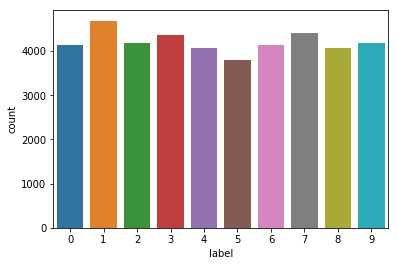

In [6]:
# create a separate array with the training labels 
Y_train = train["label"]
# take a look at distribution of labels
g= sns.countplot(Y_train)

### Data preparation

In [7]:
# remove labels from the training data
X_train = train.drop(labels=["label"], axis =1)

In [8]:
# Normalize the data, it is on the 256-color
X_train = X_train / 255.0
test = test / 255.0

In [9]:
# shape the data, converting the training and test set into arrays of the 28x28 images
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
# review the new shapes
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [11]:
# convert the training labels to categorical values
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# split the training data into training and validation sets using a random seed
r_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, 
                                                  Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=r_seed)

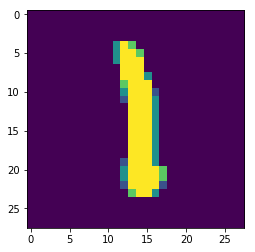

In [13]:
# Take a look at an image from the training set
g = plt.imshow(X_train[5][:,:,0])

### Create and train the Model

#### We are establishing a convolutional neural network, with layers as commented

In [14]:
model = Sequential() #establish the model

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))       # convolution layer with relu activation
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))                                # convolution layer with relu activation
model.add(MaxPool2D(pool_size=(2,2)))                                # max pooling
model.add(Dropout(0.25))                                             # dropout


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))                                # convolution layer with relu activation
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))                                # convolution layer with relu activation
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))                 # max pooling
model.add(Dropout(0.25))                                             # dropout


model.add(Flatten())                                                 # flatten
model.add(Dense(256, activation = "relu"))                           # dense layer with relu activation
model.add(Dropout(0.5))                                              # dropout
model.add(Dense(10, activation = "softmax"))                         # dense layer, softmax activation for 10 possible classes

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### A more crisp review of the model architecture and parameters along the way

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [29]:
# Define the optimizer
optimizer = RMSprop(lr=0.001,       # small learning rate 
                    rho=0.9,        # default values
                    epsilon=1e-08, 
                    decay=0.0)

In [30]:
# Compile the model
model.compile(optimizer = optimizer, 
              loss = "categorical_crossentropy", # loss function is categorical log loss
              metrics=["accuracy"])

In [31]:
# Set a learning rate annealer, adjust the learning rate if we hit stop making progress
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', # pay attention to accuracy
                                            patience=3,        # number of epochs w/o improvement to wait before reducing
                                            verbose=1,         # include messages
                                            factor=0.5,        # factor by which to decrease the learning rate
                                            min_lr=0.00001)    # a lower bound on the rate

In [32]:
epochs = 30     # review the data 30 times
batch_size = 86 # in batches of size 86

#### Model training

In [33]:
# train the model 
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Instructions for updating:
Use tf.cast instead.


Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 205s - loss: 0.2394 - acc: 0.9242 - val_loss: 0.0622 - val_acc: 0.9795
Epoch 2/30
 - 208s - loss: 0.0747 - acc: 0.9777 - val_loss: 0.0344 - val_acc: 0.9893
Epoch 3/30
 - 210s - loss: 0.0567 - acc: 0.9829 - val_loss: 0.0316 - val_acc: 0.9910
Epoch 4/30
 - 208s - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0290 - val_acc: 0.9933
Epoch 5/30
 - 205s - loss: 0.0405 - acc: 0.9881 - val_loss: 0.0249 - val_acc: 0.9929
Epoch 6/30
 - 211s - loss: 0.0359 - acc: 0.9896 - val_loss: 0.0297 - val_acc: 0.9921
Epoch 7/30
 - 209s - loss: 0.0326 - acc: 0.9907 - val_loss: 0.0299 - val_acc: 0.9919
Epoch 8/30
 - 205s - loss: 0.0310 - acc: 0.9907 - val_loss: 0.0325 - val_acc: 0.9917
Epoch 9/30
 - 209s - loss: 0.0302 - acc: 0.9914 - val_loss: 0.0293 - val_acc: 0.9919
Epoch 10/30
 - 210s - loss: 0.0274 - acc: 0.9922 - val_loss: 0.0352 - val_acc: 0.9921
Epoch 11/30
 - 205s - loss: 0.0269 - acc: 0.9922 - val_loss: 0.0455 - val_acc: 0.9907
Epoch 12/30
 -

### Results and metrics

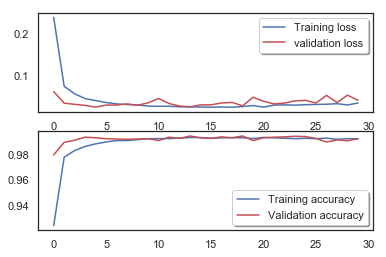

In [34]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

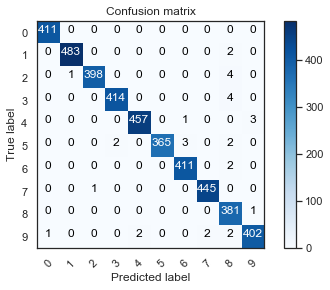

In [35]:
#confusion matrix for model
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

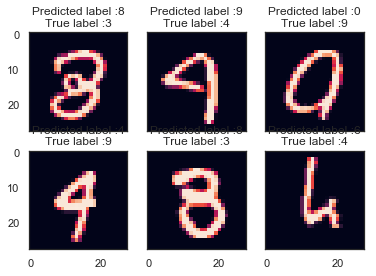

In [37]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [ ]:
# predict results
results = model.predict(test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)